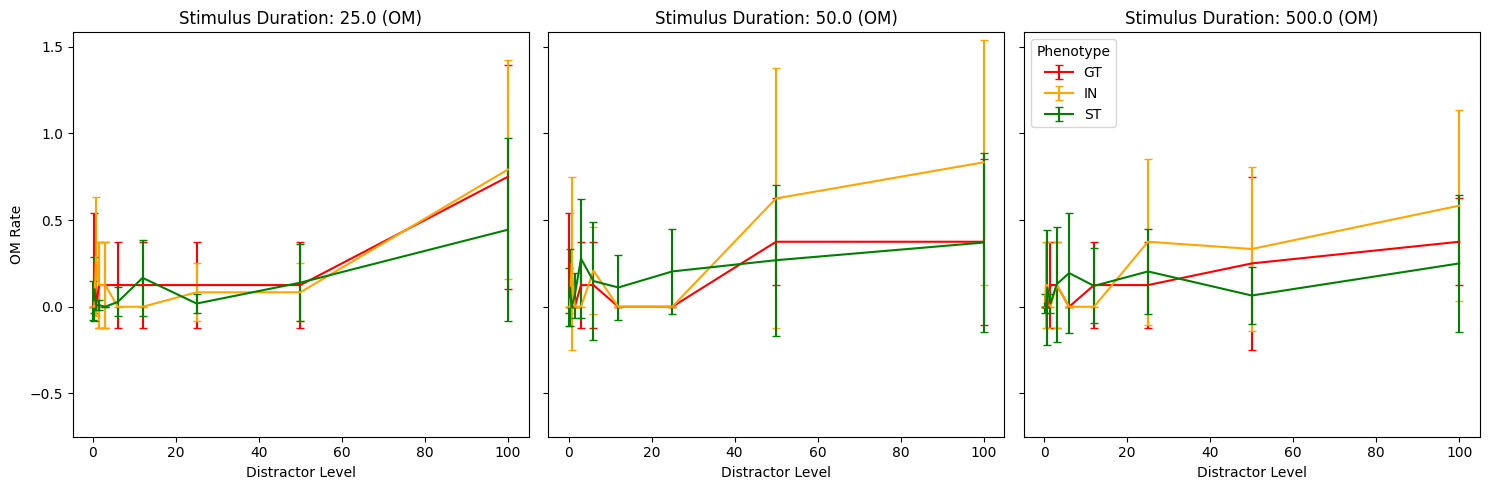

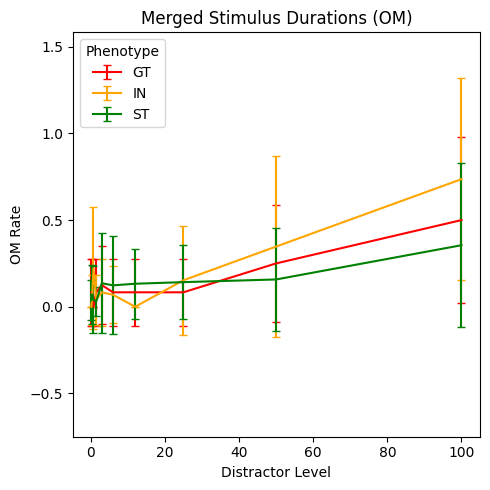

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file and the 'Tidy_Hitmiss' sheet
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)
tidy_hitmiss_df = pd.read_excel(xls, sheet_name='Tidy_Hitmiss')

# Filter out necessary data
stimulus_durations = tidy_hitmiss_df['stimulus_duration'].unique()
phenotypes = tidy_hitmiss_df['phenotype'].unique()

# Prepare a dictionary to map phenotypes to colors
colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Prepare to calculate the mean and standard deviation for each combination (using OM)
grouped_om_data = tidy_hitmiss_df.groupby(['stimulus_duration', 'Distractor_level', 'phenotype']).agg({
    'OM': ['mean', 'std']
}).reset_index()

# Prepare for plotting OM
fig, axs = plt.subplots(1, len(stimulus_durations), figsize=(15, 5), sharey=True)

# Set common Y limit for all graphs for OM
y_min_om = grouped_om_data['OM']['mean'].min() - grouped_om_data['OM']['std'].max()
y_max_om = grouped_om_data['OM']['mean'].max() + grouped_om_data['OM']['std'].max()

# Plot each stimulus duration for OM in separate subplots
for i, duration in enumerate(stimulus_durations):
    ax = axs[i]
    
    # Filter the data for the current stimulus duration
    duration_data = grouped_om_data[grouped_om_data['stimulus_duration'] == duration]
    
    # Plot each phenotype line for OM
    for phenotype in phenotypes:
        phenotype_data = duration_data[duration_data['phenotype'] == phenotype]
        ax.errorbar(phenotype_data['Distractor_level'], 
                    phenotype_data['OM']['mean'], 
                    yerr=phenotype_data['OM']['std'], 
                    label=phenotype, 
                    color=colors[phenotype], 
                    capsize=3)
    
    # Set axis labels and title
    ax.set_xlabel('Distractor Level')
    ax.set_title(f'Stimulus Duration: {duration} (OM)')
    ax.set_ylim([y_min_om, y_max_om])

# Set common Y label
axs[0].set_ylabel('OM Rate')

# Add legend and adjust layout
axs[-1].legend(title='Phenotype')
plt.tight_layout()
plt.show()

# Now for the merged data for OM (ignoring stimulus duration distinction)
merged_om_data = tidy_hitmiss_df.groupby(['Distractor_level', 'phenotype']).agg({
    'OM': ['mean', 'std']
}).reset_index()

# Plot the merged data for OM
plt.figure(figsize=(5, 5))

for phenotype in phenotypes:
    phenotype_data = merged_om_data[merged_om_data['phenotype'] == phenotype]
    plt.errorbar(phenotype_data['Distractor_level'], 
                 phenotype_data['OM']['mean'], 
                 yerr=phenotype_data['OM']['std'], 
                 label=phenotype, 
                 color=colors[phenotype], 
                 capsize=3)

plt.xlabel('Distractor Level')
plt.ylabel('OM Rate')
plt.ylim([y_min_om, y_max_om])
plt.title('Merged Stimulus Durations (OM)')
plt.legend(title='Phenotype')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import pingouin as pg

# Load the Excel file and the 'Tidy_Hitmiss' sheet
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)
tidy_hitmiss_df = pd.read_excel(xls, sheet_name='Tidy_Hitmiss')


# Clean the data and only keep relevant columns (phenotype, Animal_ID, Distractor_level, OM)
tidy_hitmiss_df_clean = tidy_hitmiss_df[['phenotype', 'Animal_ID', 'Distractor_level', 'OM']].dropna()

# Perform a mixed-design ANOVA for OM with Distractor Level as the within-subject factor
aov_om = pg.mixed_anova(dv='OM', 
                        within='Distractor_level', 
                        between='phenotype', 
                        subject='Animal_ID', 
                        data=tidy_hitmiss_df_clean, 
                        effsize='n2')  # Generalized eta-squared effect size

# Run pairwise post-hoc comparisons with Bonferroni correction for Distractor Level
posthoc_om = pg.pairwise_tests(dv='OM', 
                               within='Distractor_level', 
                               between='phenotype', 
                               subject='Animal_ID', 
                               data=tidy_hitmiss_df_clean, 
                               padjust='bonf')  # Bonferroni correction for post-hoc

# Round the results for better readability
aov_om_rounded = aov_om.round(4)
posthoc_om_rounded = posthoc_om.round(4)

# Print the ANOVA results for OM
print("ANOVA Results for OM (Distractor Level Only):")
print(aov_om_rounded)

# Print the Post-hoc results for OM
print("\nPost-hoc Results for OM (Distractor Level Only):")
print(posthoc_om_rounded)

# Optionally, you can export the results to CSV files for better viewing:
aov_om_rounded.to_csv("anova_om_results.csv", index=False)
posthoc_om_rounded.to_csv("posthoc_om_results.csv", index=False)

ANOVA Results for OM (Distractor Level Only):
             Source      SS  DF1  DF2      MS       F   p-unc  p-GG-corr  \
0         phenotype  0.0610    2   14  0.0305  0.4081  0.6726        NaN   
1  Distractor_level  2.6342    9  126  0.2927  9.2874  0.0000     0.0001   
2       Interaction  0.6712   18  126  0.0373  1.1833  0.2847        NaN   

       n2     eps sphericity  W-spher  p-spher  
0  0.0073     NaN        NaN      NaN      NaN  
1  0.3142  0.3055      False   0.0001      0.0  
2  0.0801     NaN        NaN      NaN      NaN  

Post-hoc Results for OM (Distractor Level Only):
                        Contrast Distractor_level     A     B Paired  \
0               Distractor_level                -  0.16  0.36   True   
1               Distractor_level                -  0.16  0.75   True   
2               Distractor_level                -  0.16   1.5   True   
3               Distractor_level                -  0.16   3.0   True   
4               Distractor_level           